# RSI Strategy Demonstration Notebook
This notebook demonstrates the functionality of the `RSI_Strategy` class, which extends the `Strategies` class to implement a trading strategy based on the Relative Strength Index (RSI) and Moving Average Convergence Divergence (MACD) indicators.

We will:
- Explain the key methods of the `RSI_Strategy` class.
- Use the class to fetch stock data, calculate indicators, and execute trading logic.
- Visualize the results.

### Prerequisites
Before running this notebook, ensure you have:
- An Alpaca API account.
- Installed the necessary libraries (`alpaca-trade-api`, `matplotlib`, `pandas`).

In [4]:
from strategies.RSI_Strategy import RSI_Strategy
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Replace with your Alpaca API credentials
API_KEY = 'PK6K0E5N9RIW8K6SGJYB'
SECRET_KEY = 'uXuY1UHah3PE46eyzMHmblZkg4sfjpy9CoyTVGKd'


In [5]:
# Initialize the RSI_Strategy class
rsi_strategy = RSI_Strategy(API_KEY, SECRET_KEY)
print('RSI_Strategy class initialized successfully.')

RSI_Strategy class initialized successfully.


## Relative Strength Index (RSI)
The RSI is a momentum oscillator that measures the speed and change of price movements.
It ranges from 0 to 100 and is used to identify overbought or oversold conditions.

In [6]:
# Example: Calculate RSI on sample data
from datetime import timedelta

end_date = datetime.now()
start_date = end_date - timedelta(days=30)

data = rsi_strategy.get_stock_data("QQQ", "Day", start_date.strftime('%Y-%m-%d'), end_date.strftime('%Y-%m-%d'))

# Calculate RSI
data['RSI'] = rsi_strategy.rsi(data['close'])
data.tail()

,close,high,low,trade_count,open,volume,vwap,RSI
timestamp,,,,,,,,
2025-01-02 05:00:00+00:00,510.33,516.590,505.71,5394,514.230,442507,511.049540,37.064873
2025-01-03 05:00:00+00:00,518.54,519.645,512.62,4248,513.295,486069,517.768775,44.956059
2025-01-06 05:00:00+00:00,524.55,527.900,522.05,4373,524.185,427197,525.072351,46.453943
2025-01-07 05:00:00+00:00,515.25,525.980,513.31,4748,525.895,440385,517.814338,36.442080
2025-01-08 05:00:00+00:00,515.19,516.850,510.57,3965,515.080,292333,514.654837,37.469616


## Moving Average Convergence Divergence (MACD)
The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price.

In [7]:
# Example: Calculate MACD on sample data
data['MACD'], data['Signal'] = rsi_strategy.macd(data)
print(data[['close', 'MACD', 'Signal']])

                            close      MACD    Signal
timestamp                                            
2024-12-10 05:00:00+00:00  520.55  0.000000  0.000000
2024-12-11 05:00:00+00:00  529.95  0.749858  0.149972
2024-12-12 05:00:00+00:00  526.69  1.068750  0.333727
2024-12-13 05:00:00+00:00  530.44  1.605561  0.588094
2024-12-16 05:00:00+00:00  538.19  2.626076  0.995690
2024-12-17 05:00:00+00:00  535.81  3.205840  1.437720
2024-12-18 05:00:00+00:00  516.60  2.091116  1.568399
2024-12-19 05:00:00+00:00  514.18  1.000878  1.454895
2024-12-20 05:00:00+00:00  518.62  0.489484  1.261813
2024-12-23 05:00:00+00:00  517.84  0.021020  1.013654
2024-12-24 05:00:00+00:00  530.01  0.624576  0.935839
2024-12-26 05:00:00+00:00  529.60  1.057623  0.960196
2024-12-27 05:00:00+00:00  522.55  0.822459  0.932648
2024-12-30 05:00:00+00:00  515.57  0.072032  0.760525
2024-12-31 05:00:00+00:00  511.23 -0.862941  0.435832
2025-01-02 05:00:00+00:00  510.33 -1.657430  0.017180
2025-01-03 05:00:00+00:00  5

## Risk Management
The `RSI_Strategy` class includes methods to calculate position sizes based on risk tolerance and to determine trade entry and exit points.

In [8]:
# Example: Calculate position size
symbol = 'AAPL'  # Replace with a valid stock symbol
position_size = rsi_strategy.calculate_position_size(symbol, rsi_strategy.RISK_PERCENTAGE, rsi_strategy.STOP_LOSS_PERCENTAGE)
print(f'Calculated position size for {symbol}: {position_size}')

Calculated position size for AAPL: 412


## Visualization
The `plot_data` method visualizes closing prices, RSI, and MACD with buy and sell signals.

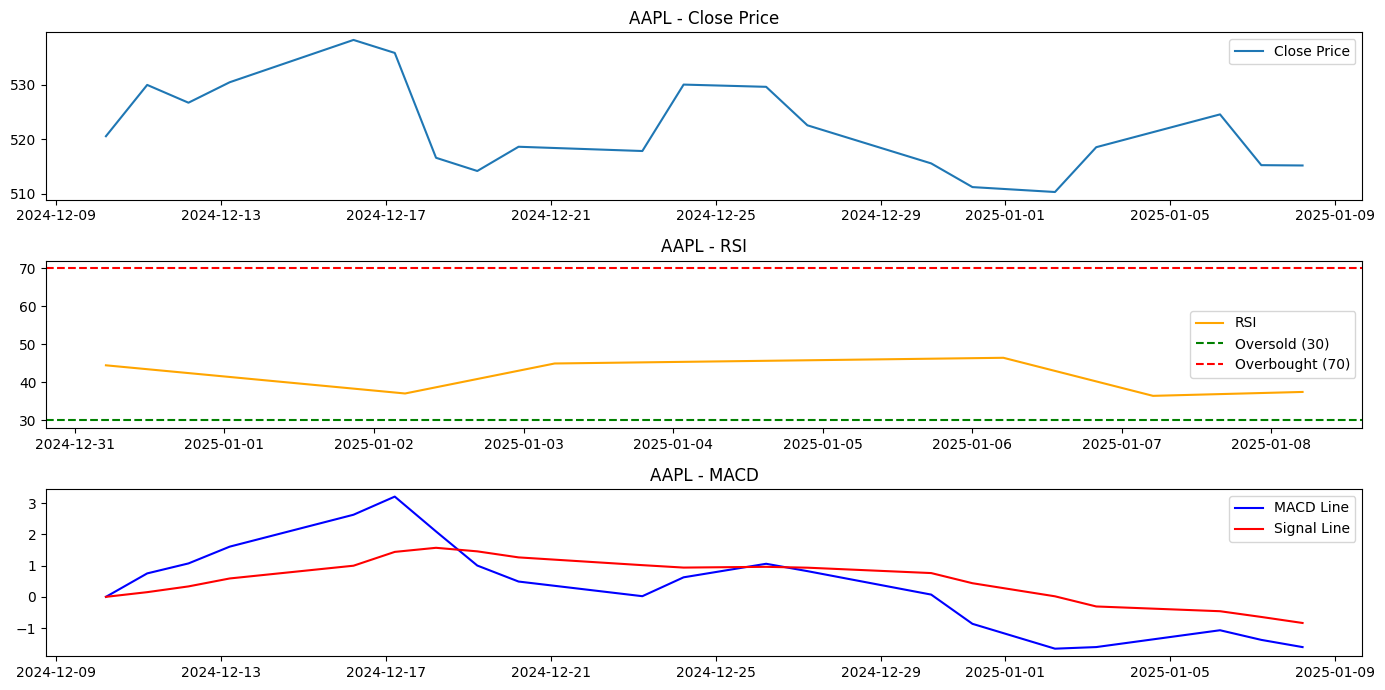

In [9]:
# Example: Plot sample data
rsi_strategy.plot_data(data, symbol='AAPL')

## Full Trading Workflow
Use the `trade` method to fetch data, calculate indicators, and execute trading logic.

Current RSI for AAPL: 35.667194092827
Current MACD for AAPL: 1.2909862679215962
Current Signal for AAPL: 3.3505121102583915
Current position in AAPL: 0 shares
Calculated position size: 412 shares


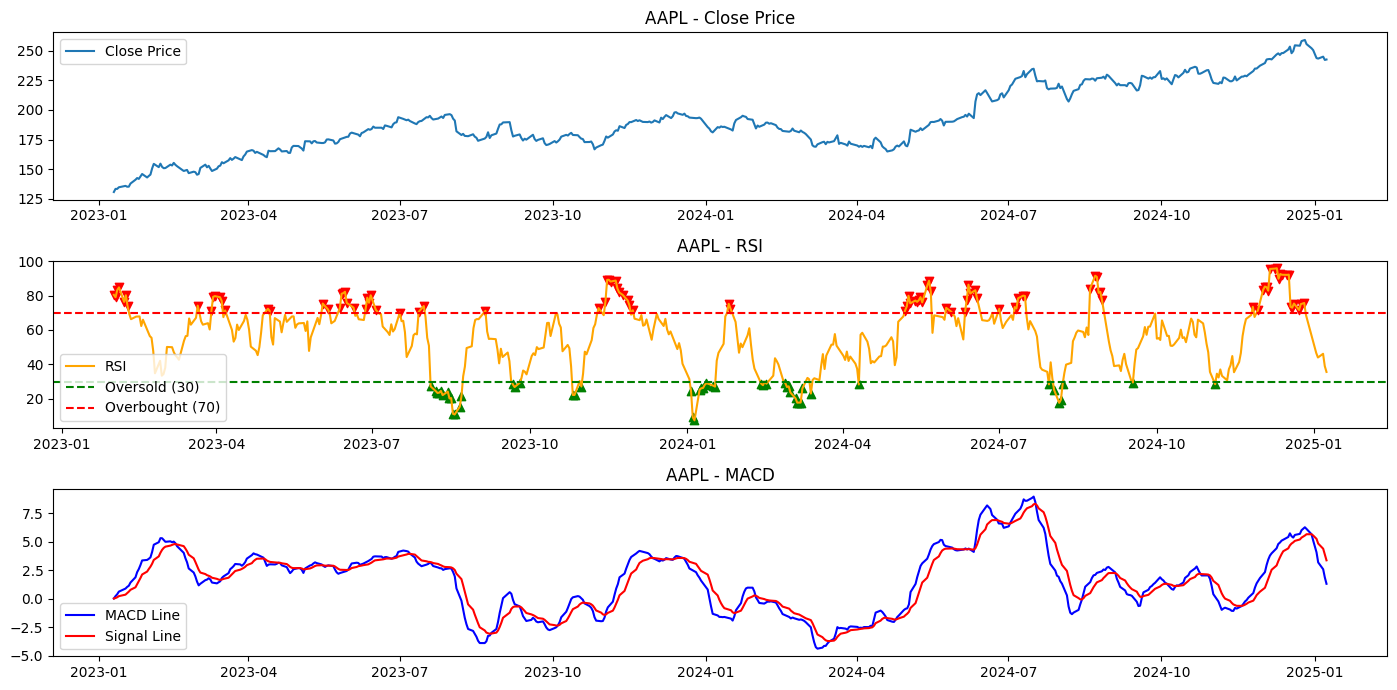

Current RSI for AAPL: 35.667194092827
Current MACD for AAPL: 1.2909862679215962
Current Signal for AAPL: 3.3505121102583915
Holding AAPL: No trading conditions met. (RSI: 35.667194092827, MACD: 1.2909862679215962)


In [10]:
# Example: Execute trading logic
rsi_strategy.trade(symbol='AAPL', qty=10)